In [89]:
import keras
keras.__version__

'2.3.1'

# First conv net from scratch

In [90]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

Let's display the architecture of our convnet so far:

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [92]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [94]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

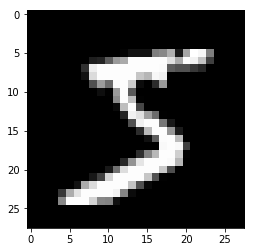

In [95]:
import numpy as np
import matplotlib.pylab as plt

first_image = train_images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [96]:
train_labels[0]

5

In [97]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [98]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.3481 - categorical_accuracy: 0.8921 - val_loss: 0.1236 - val_categorical_accuracy: 0.9618
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0780 - categorical_accuracy: 0.9759 - val_loss: 0.0881 - val_categorical_accuracy: 0.9713
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0496 - categorical_accuracy: 0.9843 - val_loss: 0.0471 - val_categorical_accuracy: 0.9850
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0365 - categorical_accuracy: 0.9890 - val_loss: 0.0314 - val_categorical_accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0285 - categorical_accuracy: 0.9907 - val_loss: 0.0375 - val_categorical_accuracy: 0.9880
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0230 - c

Let's evaluate the model on the test data:

In [99]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 103us/step


In [100]:
test_acc

0.9916999936103821

In [101]:
test_loss

0.025322498137573167

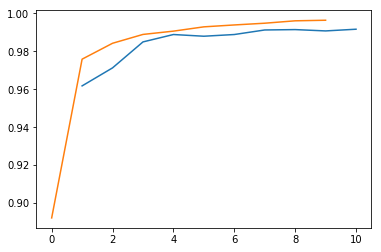

In [103]:
plt.plot(range(1,11),history.history['val_categorical_accuracy'], history.history['categorical_accuracy'])
plt.show()

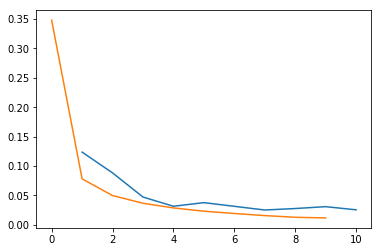

In [104]:
plt.plot(range(1,11),history.history['val_loss'], history.history['loss'])
plt.show()